In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import math

data = pd.read_csv('Traffic.csv')
print(data.head())

   _id          id  device_id    record_oid count_start_date count_end_date  \
0    1  1011743669         85  1.445865e+09       2019-04-18     2019-04-26   
1    2  1026101993        140  1.121444e+09       2019-01-24            NaN   
2    3  1032382575         11  1.539893e+09       2018-08-28     2018-09-04   
3    4   103627606          9  7.341951e+08       2018-07-17     2018-08-01   
4    5  1039546167        144           NaN              NaN            NaN   

   average_daily_car_traffic  average_daily_bike_traffic counter_number  \
0                     4949.0                         NaN              6   
1                        NaN                         NaN            NaN   
2                        NaN                         NaN            NaN   
3                     2741.0                         NaN            NaN   
4                        NaN                         NaN            NaN   

         counter_type  ...  longitude   latitude           neighborhood  \

Cleaned up the general information from the csv and removed unecessary information including remove null neighborhoods.

In [3]:
data = data.drop(columns=["_id", "id", "device_id", "record_oid", "count_start_date", "count_end_date", "average_daily_bike_traffic", "counter_number", "counter_type", "longitude", "latitude", "council_district", "ward", "tract", "public_works_division", "pli_division", "police_zone", "fire_zone", "speed_limit", "max_speed", "median_speed", "percent_over_limit", "speed85_percent", "speed95_percent"])
query_mask = data["neighborhood"].notnull()
data = data[query_mask]
data["average_daily_car_traffic"] = data["average_daily_car_traffic"].fillna(0)

print(data)

     average_daily_car_traffic           neighborhood
0                       4949.0            Polish Hill
1                          0.0  Central Lawrenceville
2                          0.0                Windgap
3                       2741.0    Squirrel Hill South
4                          0.0            Perry North
..                         ...                    ...
415                        0.0            Summer Hill
416                        0.0       Brighton Heights
417                        0.0             Upper Hill
418                        0.0            Middle Hill
419                        0.0       Crawford-Roberts

[418 rows x 2 columns]


Create main dictionary for information

In [4]:
traf_dict = dict()

%store -r frequencies

neighborhoods = frequencies.keys()

for neigh in frequencies.keys():
    traf_dict[neigh] = 0

print(len(traf_dict))
print(traf_dict)

98
{'Bloomfield': 0, 'Outside City': 0, 'Westwood': 0, 'East Allegheny': 0, 'Crafton Heights': 0, 'Greenfield': 0, 'Brookline': 0, 'Regent Square': 0, 'East Liberty': 0, 'East Hills': 0, 'Carrick': 0, 'Allegheny Center': 0, 'South Side Flats': 0, 'Sheraden': 0, 'East Carnegie': 0, 'Golden Triangle/Civic Arena': 0, 'Point Breeze North': 0, 'Perry South': 0, 'Allentown': 0, 'North Shore': 0, 'Marshall-Shadeland': 0, 'Central Oakland': 0, 'Middle Hill': 0, 'Strip District': 0, 'Lincoln-Lemington-Belmar': 0, 'Central Northside': 0, 'Troy Hill-Herrs Island': 0, 'Highland Park': 0, 'Homewood North': 0, 'Northview Heights': 0, 'Brighton Heights': 0, 'Hazelwood': 0, 'Perry North': 0, 'Bedford Dwellings': 0, 'Elliott': 0, 'Beechview': 0, 'Fineview': 0, 'Glen Hazel': 0, 'Spring Hill-City View': 0, 'Bluff': 0, 'Manchester': 0, 'Homewood West': 0, 'Outside County': 0, 'Point Breeze': 0, 'Homewood South': 0, 'Squirrel Hill South': 0, 'Terrace Village': 0, 'Upper Lawrenceville': 0, 'Arlington': 0, '

Fill dictionary with traffic data and calculate the average of the places with data

In [5]:
total = 0


for row in data.iterrows():
    traf_dict[row[1]["neighborhood"]] += row[1]["average_daily_car_traffic"]
    total += int(row[1]["average_daily_car_traffic"])

vals = 0
for n in neighborhoods:
    if traf_dict[n] != 0:
        vals += 1

average = total / vals
print(vals, average)
print(traf_dict)

64 14570.140625
{'Bloomfield': 43101.0, 'Outside City': 0, 'Westwood': 15400.0, 'East Allegheny': 1924.0, 'Crafton Heights': 11500.0, 'Greenfield': 7158.0, 'Brookline': 39144.0, 'Regent Square': 16729.0, 'East Liberty': 51247.0, 'East Hills': 16253.0, 'Carrick': 13787.0, 'Allegheny Center': 2386.0, 'South Side Flats': 115.0, 'Sheraden': 8532.0, 'East Carnegie': 0, 'Golden Triangle/Civic Arena': 0, 'Point Breeze North': 9928.0, 'Perry South': 12075.0, 'Allentown': 0, 'North Shore': 10350.0, 'Marshall-Shadeland': 15520.0, 'Central Oakland': 11306.0, 'Middle Hill': 0.0, 'Strip District': 29075.0, 'Lincoln-Lemington-Belmar': 195.0, 'Central Northside': 5945.0, 'Troy Hill-Herrs Island': 0, 'Highland Park': 23471.0, 'Homewood North': 7027.0, 'Northview Heights': 0, 'Brighton Heights': 7547.0, 'Hazelwood': 2579.0, 'Perry North': 19114.0, 'Bedford Dwellings': 0, 'Elliott': 4028.0, 'Beechview': 4255.0, 'Fineview': 419.0, 'Glen Hazel': 0, 'Spring Hill-City View': 2586.0, 'Bluff': 5365.0, 'Manche

We use the average traffic of the neighborhoods with data and apply it across all neighborhoods currently listed as 0. This is due to the fact that all neighborhoods have >0 traffic.

In [6]:
for n in neighborhoods:
    if traf_dict[n] == 0:
        traf_dict[n] = int(average)

print(traf_dict)
%store traf_dict

{'Bloomfield': 43101.0, 'Outside City': 14570, 'Westwood': 15400.0, 'East Allegheny': 1924.0, 'Crafton Heights': 11500.0, 'Greenfield': 7158.0, 'Brookline': 39144.0, 'Regent Square': 16729.0, 'East Liberty': 51247.0, 'East Hills': 16253.0, 'Carrick': 13787.0, 'Allegheny Center': 2386.0, 'South Side Flats': 115.0, 'Sheraden': 8532.0, 'East Carnegie': 14570, 'Golden Triangle/Civic Arena': 14570, 'Point Breeze North': 9928.0, 'Perry South': 12075.0, 'Allentown': 14570, 'North Shore': 10350.0, 'Marshall-Shadeland': 15520.0, 'Central Oakland': 11306.0, 'Middle Hill': 14570, 'Strip District': 29075.0, 'Lincoln-Lemington-Belmar': 195.0, 'Central Northside': 5945.0, 'Troy Hill-Herrs Island': 14570, 'Highland Park': 23471.0, 'Homewood North': 7027.0, 'Northview Heights': 14570, 'Brighton Heights': 7547.0, 'Hazelwood': 2579.0, 'Perry North': 19114.0, 'Bedford Dwellings': 14570, 'Elliott': 4028.0, 'Beechview': 4255.0, 'Fineview': 419.0, 'Glen Hazel': 14570, 'Spring Hill-City View': 2586.0, 'Bluff

Create a graph showing the best of the neighborhoods

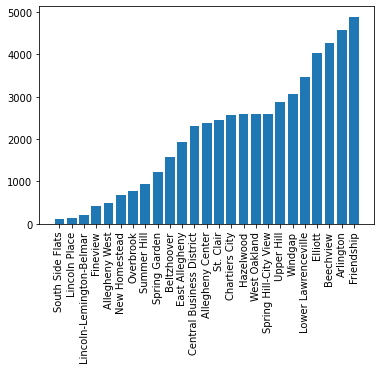

In [10]:
best_traf = copy.deepcopy(traf_dict)

for key, value in traf_dict.items():
    if value > 5000:
        best_traf.pop(key)

best_traf = dict(sorted(best_traf.items(), key=lambda item: item[1]))
plt.bar(range(len(best_traf)), list(best_traf.values()), tick_label=list(best_traf.keys()))
plt.xticks(rotation='vertical')
plt.show()

**Conclusion:** South Side Flats was by far the least busy neighborhood. Though the car traffic data missed several neighborhoods, several very good neighborhoods still had under 5,000 vehicles drive through it daily, which I deemed to not be too busy.